# Earnings by College Major Visualization

I'm exploring data released from the [American Community Survey](https://www.census.gov/programs-surveys/acs/) which surveyed data on college majors. The news website 538 cleaned the dataset and released it [here](https://data.fivethirtyeight.com/) as part of a [story](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/). Helpful information including a data dictionary can be found on 538's github [repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

I want to answer questions like: 

1. Do students in more popular majors make more money? 

2. How many majors are predominantly male? Predominantly female? 

3. Which category of majors have the most students?

In [38]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
recent_grads = pd.read_csv("college-majors/recent-grads.csv")
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [3]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
#dropping rows with blank values
recent_grads = recent_grads.dropna()
recent_grads

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


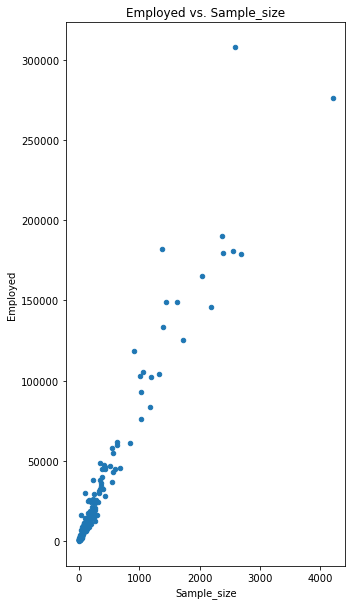

In [8]:
#one way to generate a chart using pandas (with matplotlib in the background)
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size', figsize=(5,10))

Text(0.5, 1.0, 'Employed vs. Sample_size')

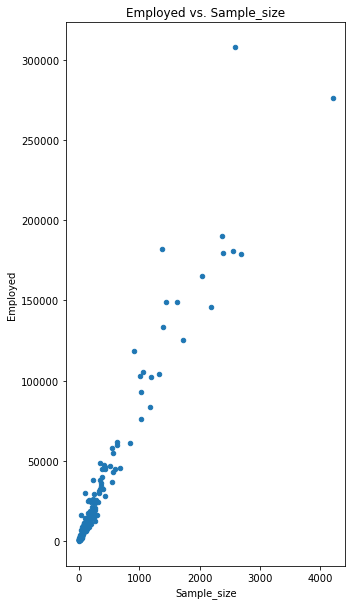

In [9]:
#another way to generate a plot using matplotlib
ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', figsize=(5,10))
ax.set_title('Employed vs. Sample_size')

Let's explore the following relationships:

1. Sample_size and Median

2. Sample_size and Unemployment_rate

3. Full_time and Median

4. ShareWomen and Unemployment_rate

5. Men and Median

6. Women and Median


In [10]:
#create xticks list for following scatter plot
xticks = []
for i in range(0, 4501):
    if i % 500 == 0:
        xticks.append(i)

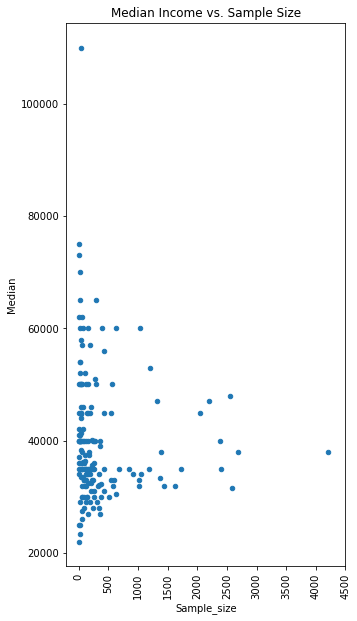

In [11]:
#1. Exploring the relationship between median income of full-time, year-round workers and sample size of full-time, year-round workers (for purposes of calculating median income) for each college major.
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median Income vs. Sample Size', figsize=(5,10), xticks=xticks, rot=90)

Looks like the sample size is 0 - 500 people for many of the majors. At first sample size tends to increase until the median income of around \$40k, then from around \$40k onward, sample size decreases. This suggests the majors with the greatest sample sizes (potentially the most popular) earn around \$40k in median income, with less popular majors earning over \$60k in median income.

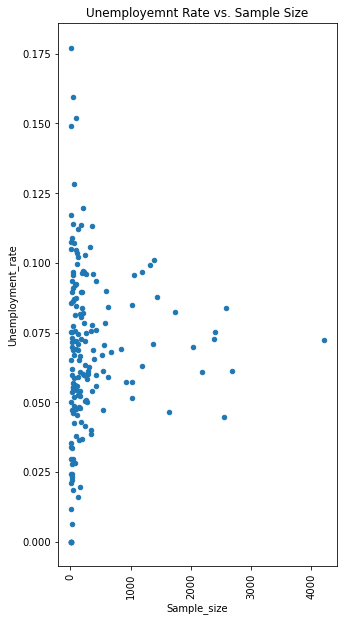

In [28]:
#2. Exploring the relationship between sample size of full-time, year-round workers and unemployment rate for each college major.
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Unemployment Rate vs. Sample Size', figsize=(5,10), rot=90)

At first sample size tends to increase until the unemployment rate of around 7.5%, then from around 7.5% onward, sample size decreases. This suggests the majors with the greatest sample sizes (potentially the most popular) have around a 7.5% unemployment rate, with majors with smaller sample sizes having unemployment rates over 12.5%.

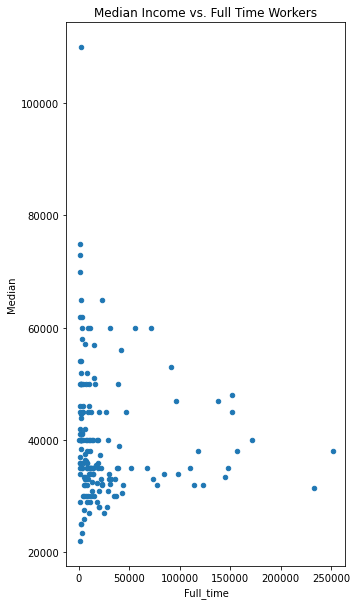

In [23]:
#3. Exploring the relationship between full-time workers (employed at greater than 35 hours a week) and median income for each college major.
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Median Income vs. Full Time Workers', figsize=(5,10))

Demonstrates the same sort of relationship we observed in the two previous charts, with the most full time workers centered around \$40k of income.

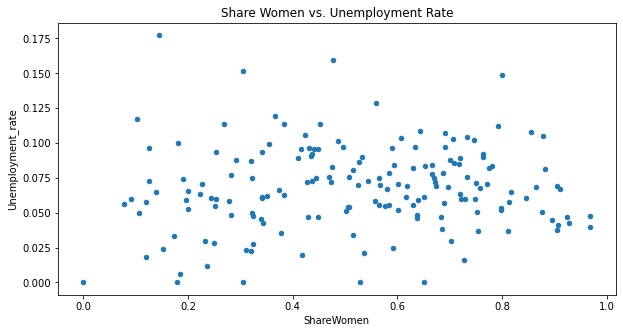

In [33]:
#4. Exploring the relationship between the share of women and unemployment rate for each college major.
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Share Women vs. Unemployment Rate', figsize=(10,5))

Doesn't appear to be any strong relationship between the share of women in a college major and the unemployment rate for the major.

"\nsuperseded\nrecent_grads.plot(x='Men', y='Median', kind='scatter', title='Number of Men vs. Median Income', figsize=(10,5))\nrecent_grads.plot(x='Women', y='Median', kind='scatter', title='Number of Women vs. Median Income', figsize=(10,5))\n"

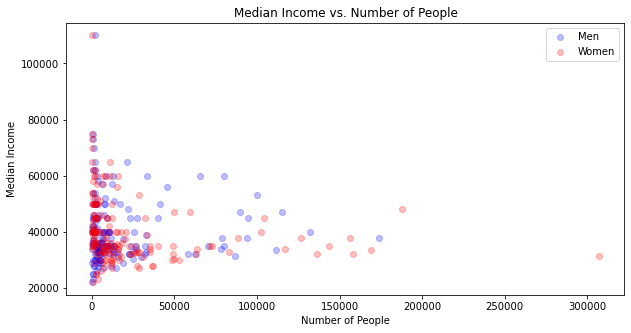

In [73]:
#5/6. Exploring the relationship between number of men / women and median income for each college major.
fig, ax  = plt.subplots()
fig.set_size_inches(10, 5)
ax.scatter(recent_grads['Men'], recent_grads['Median'], c='Blue', alpha=0.25, label='Men')
ax.scatter(recent_grads['Women'], recent_grads['Median'], c='Red', alpha=0.25, label= 'Women')
ax.set_title('Median Income vs. Number of People')
ax.set_xlabel('Number of People')
ax.set_ylabel('Median Income')
ax.legend()

"""
superseded
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Number of Men vs. Median Income', figsize=(10,5))
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Number of Women vs. Median Income', figsize=(10,5))
"""

Looks like the most popular majors (for men and women) center around \$30k to \$40k of median income. One interesting observation is that there appears to be a cluster of majors with 25,000 to 100,000 men and with \$50k - \$60k of income that do not exist for women.

Next, let's generate some histograms to explore the distribution of a handful of columns.

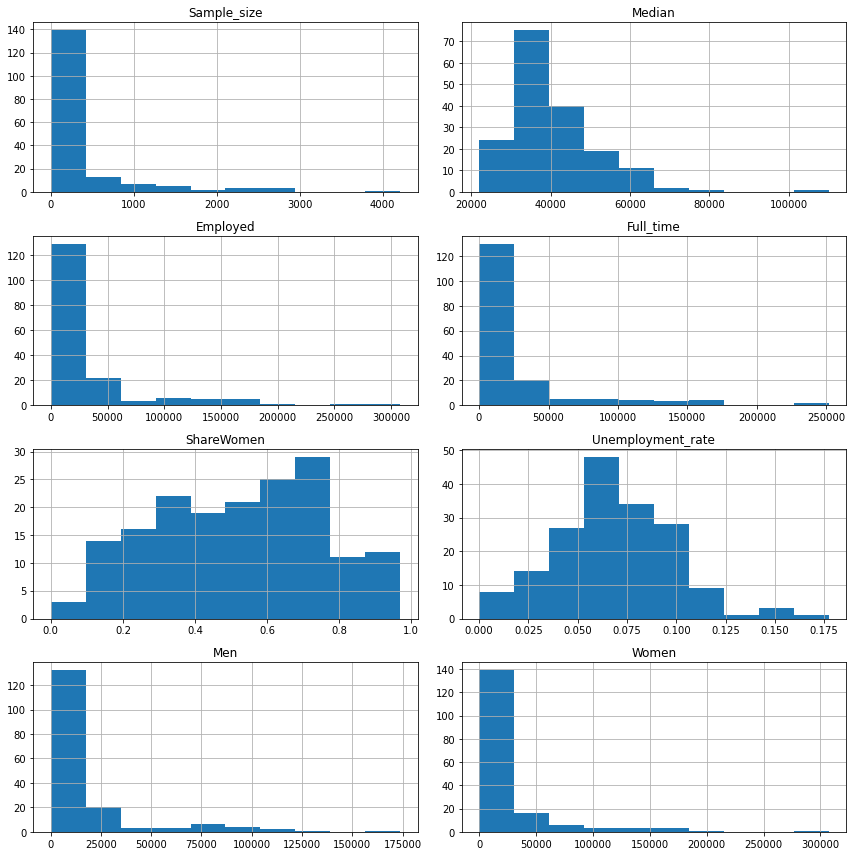

In [87]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize = (12,12))
for i in range(0, 8):
    ax = fig.add_subplot(4, 2, i+1)
    ax = recent_grads[cols[i]].hist(bins = 10)
    ax.set_title(cols[i])
fig.tight_layout()

Next, let's create some scatter matrices.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee655a9fd0>,
      dtype=object)

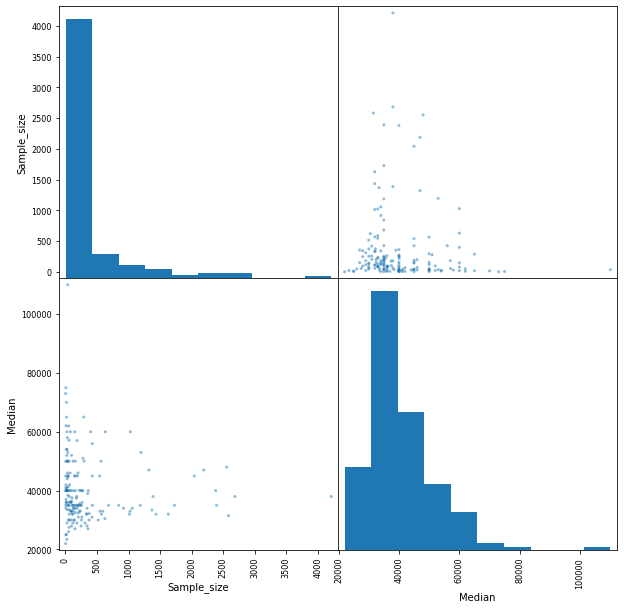

In [91]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee627df8e0>,
      dtype=object)

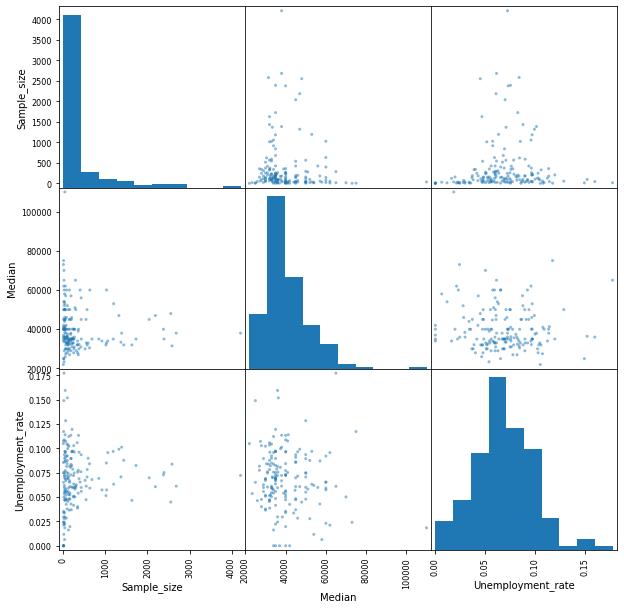

In [92]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

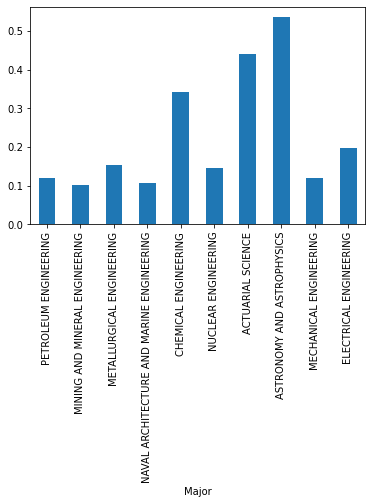

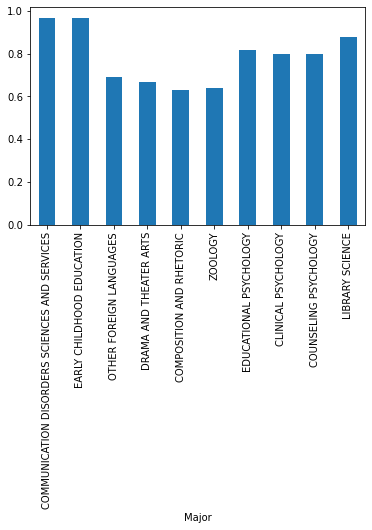

In [103]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', rot=90, legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', rot=90, legend=False)